In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [2]:
max_features = 10000
maxlen = 500

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
              )

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
    )

Epoch 1/5
137/137 [==============================] - 49s 263ms/step - loss: 0.5439 - acc: 0.7126 - val_loss: 0.4184 - val_acc: 0.8256
Epoch 2/5
137/137 [==============================] - 30s 222ms/step - loss: 0.3246 - acc: 0.8715 - val_loss: 0.3456 - val_acc: 0.8533
Epoch 3/5
137/137 [==============================] - 23s 169ms/step - loss: 0.2141 - acc: 0.9235 - val_loss: 0.3262 - val_acc: 0.8700
Epoch 4/5
137/137 [==============================] - 19s 139ms/step - loss: 0.1500 - acc: 0.9518 - val_loss: 0.3614 - val_acc: 0.8691
Epoch 5/5
137/137 [==============================] - 19s 140ms/step - loss: 0.1171 - acc: 0.9634 - val_loss: 0.3666 - val_acc: 0.8699


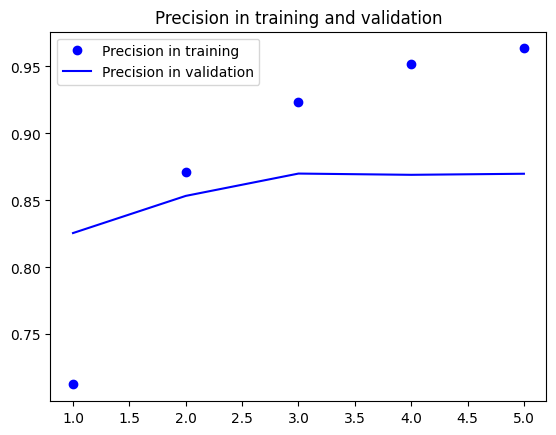

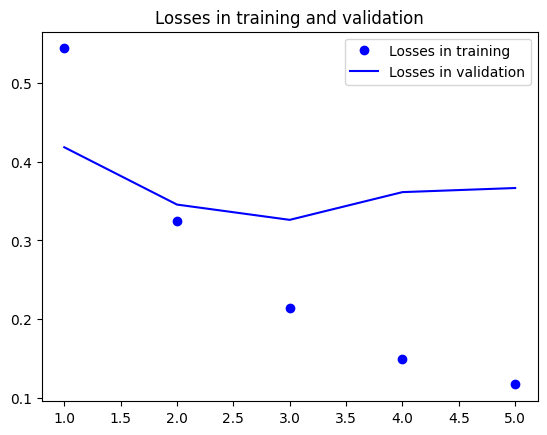

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precision in training')
plt.plot(epochs, val_acc, 'b', label='Precision in validation')
plt.title('Precision in training and validation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Losses in training')
plt.plot(epochs, val_loss, 'b', label='Losses in validation')
plt.title('Losses in training and validation')
plt.legend()

plt.show()

In [10]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predictable: {binary_predictions[i]}, Actual: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 20s 23ms/step
Predictable: 0, Actual: 0
Predictable: 1, Actual: 1
Predictable: 1, Actual: 1
Predictable: 1, Actual: 0
Predictable: 1, Actual: 1
Predictable: 1, Actual: 1
Predictable: 1, Actual: 1
Predictable: 0, Actual: 0
Predictable: 1, Actual: 0
Predictable: 1, Actual: 1
782/782 [==============================] - 19s 25ms/step - loss: 0.4027 - acc: 0.8575
Test Loss: 0.4026890993118286
Test Accuracy: 0.8575199842453003
